# 24. 아파트 건설사 카테고리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [54]:
df = pd.read_csv('../data/preprocessed/22_subway_line.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_39750/2085909846.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/22_subway_line.csv')


In [55]:
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,공시지가 평균,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리,지하철 카테고리
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타,분당선
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타,분당선
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타,분당선
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291,69.322,기타,분당선
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291,69.322,기타,분당선


In [56]:
categories = ['포스코', '현대', '삼성', '대우', '쌍용', 'GS|gs|지에스', '한화',
              '건영', 'LG|lg|엘쥐|엘지', 'LIG|lig', '한라', '힐스테이트']

In [57]:
df[df['k-건설사(시공사)'].str.contains('한라')]

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,공시지가 평균,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리,지하철 카테고리
2282,서울특별시 강남구 수서동,712,712.0,0.0,수서한아름,97.63,201710,13,4,1993,...,6.858562e+06,85.3,24,0,50.544722,16.377676,0.540638,70.879100,기타,3호선
2283,서울특별시 강남구 수서동,712,712.0,0.0,수서한아름,129.45,201710,16,2,1993,...,6.858562e+06,85.3,24,0,50.544722,16.377676,0.540638,70.879100,기타,3호선
2284,서울특별시 강남구 수서동,712,712.0,0.0,수서한아름,97.63,201710,19,11,1993,...,6.858562e+06,85.3,24,0,50.544722,16.377676,0.540638,70.879100,기타,3호선
2285,서울특별시 강남구 수서동,712,712.0,0.0,수서한아름,97.63,201710,20,1,1993,...,6.858562e+06,85.3,24,0,50.544722,16.377676,0.540638,70.879100,기타,3호선
2286,서울특별시 강남구 수서동,712,712.0,0.0,수서한아름,129.45,201710,24,12,1993,...,6.858562e+06,85.3,24,0,50.544722,16.377676,0.540638,70.879100,기타,3호선
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125880,서울특별시 송파구 장지동,879,879.0,0.0,송파더센트레,59.96,202307,27,2,2013,...,5.933125e+06,38.0,10,0,45.212818,12.462049,0.863743,50.938744,기타,기타
1127223,서울특별시 은평구 진관동,150,150.0,0.0,은평뉴타운기자촌11단지,84.89,202307,16,1,2015,...,3.162188e+06,38.0,8,0,45.212818,12.462049,-0.462527,50.938744,기타,3호선
1127224,서울특별시 은평구 진관동,150,150.0,0.0,은평뉴타운기자촌11단지,59.88,202307,21,12,2015,...,3.162188e+06,38.0,8,0,45.212818,12.462049,-0.462527,50.938744,기타,3호선
1127225,서울특별시 은평구 진관동,150,150.0,0.0,은평뉴타운기자촌11단지,84.78,202308,11,6,2015,...,3.162188e+06,46.0,8,0,45.056635,13.703570,-0.741097,50.991003,기타,3호선


In [58]:
for category in categories:
    df[category] = df['k-건설사(시공사)'].str.contains(category)

In [59]:
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,삼성,대우,쌍용,GS|gs|지에스,한화,건영,LG|lg|엘쥐|엘지,LIG|lig,한라,힐스테이트
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,False,False,False,False,False,False,False,False,False,False
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,False,False,False,False,False,False,False,False,False,False
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,False,False,False,False,False,False,False,False,False,False
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,False,False,False,False,False,False,False,False,False,False
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,False,False,False,False,False,False,False,False,False,False


In [60]:
# '기타' 카테고리 열 생성
df['기타'] = ~df[categories].any(axis=1)

In [61]:
df[['k-건설사(시공사)']]

,k-건설사(시공사)
0,우성건설
1,우성건설
2,우성건설
3,우성건설
4,우성건설
...,...
1128089,한진중공업
1128090,한진중공업
1128091,한진중공업
1128092,한진중공업


In [62]:
# '카테고리' 열을 범주형으로 변환
df['건설사 카테고리'] = df[categories+['기타']].idxmax(axis=1)

In [63]:
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,쌍용,GS|gs|지에스,한화,건영,LG|lg|엘쥐|엘지,LIG|lig,한라,힐스테이트,기타,건설사 카테고리
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,False,False,False,False,False,False,False,False,True,기타
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,False,False,False,False,False,False,False,False,True,기타
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,False,False,False,False,False,False,False,False,True,기타
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,False,False,False,False,False,False,False,False,True,기타
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,False,False,False,False,False,False,False,False,True,기타


In [64]:
# 카테고리별 평균 실거래가 계산
category_mean_target = df.groupby('건설사 카테고리')['target'].mean().reset_index()
category_mean_target = category_mean_target.rename(columns={'target': '평균 실거래가'})

In [65]:
category_mean_target

,건설사 카테고리,평균 실거래가
0,GS|gs|지에스,106680.468922
1,LG|lg|엘쥐|엘지,77505.105852
2,LIG|lig,88903.408759
3,건영,85168.303875
4,기타,55660.024590
5,대우,68328.650464
6,삼성,88236.020068
7,쌍용,74323.980323
8,포스코,86998.190655
9,한라,79332.663957


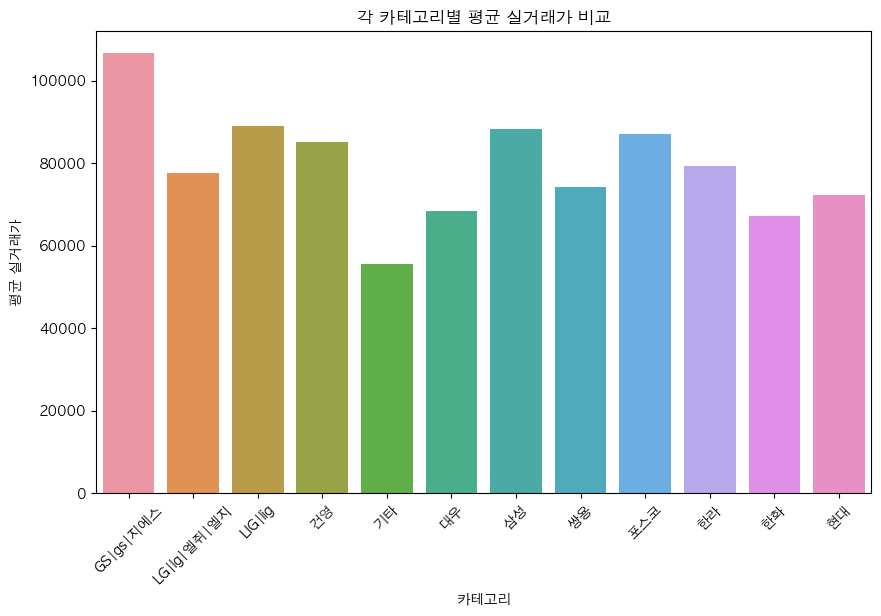

In [66]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='건설사 카테고리', y='평균 실거래가', data=category_mean_target)
plt.title('각 카테고리별 평균 실거래가 비교')
plt.xlabel('카테고리')
plt.ylabel('평균 실거래가')
plt.xticks(rotation=45)
plt.show()

In [67]:
columns_to_drop = categories + ['기타']
df.drop(columns=columns_to_drop, inplace=True)

In [68]:
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리,지하철 카테고리,건설사 카테고리
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타,분당선,기타
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타,분당선,기타
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타,분당선,기타
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,118.0,31,1,46.647899,27.764117,2.459291,69.322,기타,분당선,기타
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,118.0,31,1,46.647899,27.764117,2.459291,69.322,기타,분당선,기타


In [69]:
df.to_csv('../data/preprocessed/24_3_apart_const_category.csv', index=False)